# Data Analysis and Data Science using Python Task 7

### Part 1: Dimensionality Reduction

### Required Libraries

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler

### Loading the dataset

In [4]:
df=pd.read_csv(r'C:\Users\koust\OneDrive\Desktop\Jupyter\Main Flow\Task 7\iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
#Separate features and target
X=df.drop('species',axis=1)
y=df['species']

In [6]:
#Standardize the feature data
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [7]:
#Apply PCA to reduce to 2 components
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

In [8]:
#Create a DataFrame with PCA results
df_pca=pd.DataFrame(data=X_pca,columns=['PC1','PC2'])
df_pca['species']=y

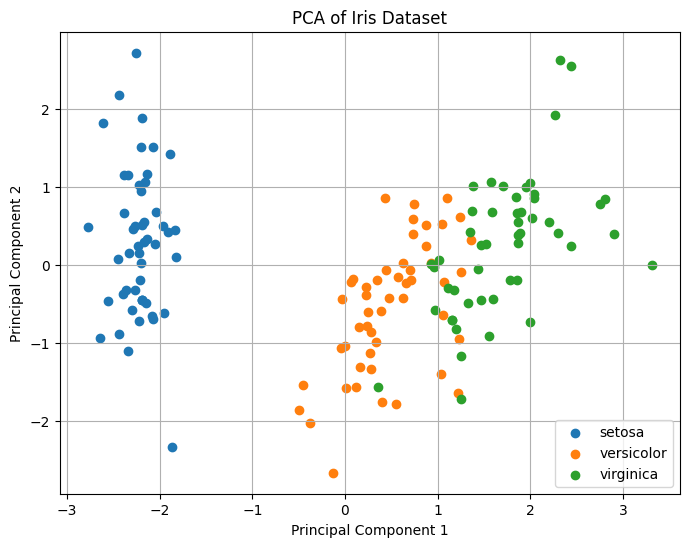

In [9]:
#Plot the PCA results
plt.figure(figsize=(8,6))
for species in df_pca['species'].unique():
  subset=df_pca[df_pca['species']==species]
  plt.scatter(subset['PC1'],subset['PC2'],label=species)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()

**Outputs**

1. 2D Dataframe (df_pca) with columns PC1, PC2 and species.
2. Scatter plot showing clusters based on PCA.



### Part 2: Stock Price Prediction Using Time Series Forecasting

### Loading the dataset

In [15]:
df=pd.read_csv(r'C:\Users\koust\OneDrive\Desktop\Jupyter\Main Flow\Task 7\IBM.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,129.063095,129.942642,128.843216,129.464630,105.346336,3293436
1,2020-01-03,127.695984,128.929260,127.686424,128.432129,104.506195,2482890
2,2020-01-06,127.552582,128.336517,127.342255,128.202682,104.319489,2537073
3,2020-01-07,127.810707,129.024857,127.533463,128.288712,104.389488,3232977
4,2020-01-08,128.594650,129.885284,128.030594,129.359467,105.260765,4545916
...,...,...,...,...,...,...,...
1084,2024-04-24,183.169998,184.289993,181.399994,184.100006,184.100006,7616600
1085,2024-04-25,168.199997,172.449997,165.660004,168.910004,168.910004,16702200
1086,2024-04-26,167.500000,167.869995,165.729996,167.130005,167.130005,8983800
1087,2024-04-29,167.399994,168.220001,166.229996,167.429993,167.429993,5242200


In [16]:
#Convert 'Date' column to datetime and set as index
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df=df.sort_index()

In [17]:
#Handle Missing Values
df.fillna(method='ffill',inplace=True)

In [18]:
#Display first few rows
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,129.063095,129.942642,128.843216,129.464630,105.346336,3293436
2020-01-03,127.695984,128.929260,127.686424,128.432129,104.506195,2482890
2020-01-06,127.552582,128.336517,127.342255,128.202682,104.319489,2537073
2020-01-07,127.810707,129.024857,127.533463,128.288712,104.389488,3232977
2020-01-08,128.594650,129.885284,128.030594,129.359467,105.260765,4545916


### Plotting Close Price

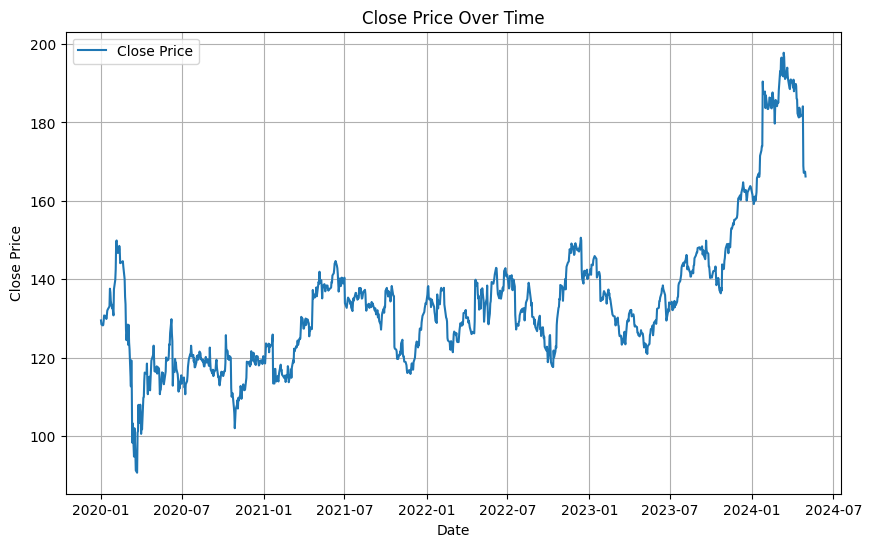

In [19]:
plt.figure(figsize=(10,6))
plt.plot(df['Close'], label='Close Price')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

### Feature Engineering

In [20]:
#Lag feature
df['Close_Lag1']=df['Close'].shift(1)

#Rolling Mean
df['MA7']=df['Close'].rolling(window=7).mean()

#Drop NaN rows generated by lag/rolling
df=df.dropna()

### Train-Test Split and ARIMA Modeling

In [21]:
from os import close
#Use only 'close' for ARIMA modeling
close_series=df['Close']

#Train-test split (e.g., last 30 days for test)
train= close_series[:-30]
test=close_series[-30:]

# Build and fit ARIMA model (initial guess for p,d,q)
model=ARIMA(train,order=(5,1,0))
model_fit=model.fit()


C:\Users\koust\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\koust\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\koust\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [22]:
# Forecast
forecast = model_fit.forecast(steps=30)
#Evaluation
mae=mean_absolute_error(test, forecast)
rmse=np.sqrt(mean_squared_error(test,forecast))
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Absolute Error (MAE): 7.34
Root Mean Squared Error (RMSE): 10.46


C:\Users\koust\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


### Plotting Forecast vs Actual

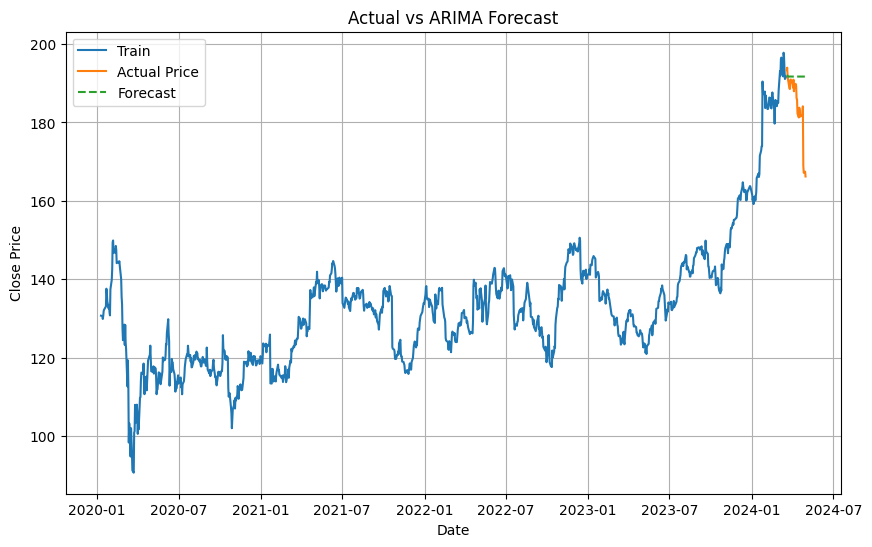

In [23]:
plt.figure(figsize=(10,6))
plt.plot(train.index,train,label='Train')
plt.plot(test.index,test,label='Actual Price')
plt.plot(test.index,forecast,label='Forecast',linestyle='--')
plt.title('Actual vs ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

Final Conclusion

Part 1: PCA - Dimensionality Reduction

1. PCA reduced the 4D Iris dataset to 2 principal components.
2. The 2D scatter plot showed clear separation between Iris species.
3. PCA helped visualize class separability and preserved most data variance

Part 2: Stock Price Prediction using ARIMA

1. Preprocessed stock data and handled missing values.
2. Used ARIMA model to forecast next 30 days of closing prices.
3. Evaluation metrics:
MAE: 7.34
RMSE: 10.46

4. The model captured trend well; suitable for short-term forecasting.